In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pysentani as sti
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
survey['access_type'] = sti.access_type(survey)

In [2]:
for app in ['TV', 'radio', 'fridge', 'fan', 'rice_cooker', 'lighting']:
    # generate column labels for each appliance
    wk_col = 'app_{}_per_wk'.format(app)
    hr_col = 'app_{}_hrs'.format(app)
    # if null or within range use value, otherwise use max possible value
    survey[hr_col] = survey[hr_col].where(survey[hr_col].isnull() | (survey[hr_col] <= 24), 24)
    survey[wk_col] = survey[wk_col].where(survey[wk_col].isnull() | (survey[wk_col] <= 7), 7)

    # ensure non-null values are within bounds
    assert(all(survey[wk_col].dropna() <= 7))
    assert(all(survey[wk_col].dropna() >= 0))
    assert(all(survey[hr_col].dropna() <= 24))
    assert(all(survey[hr_col].dropna() >= 0))

In [3]:
powers = {'TV':0.040, 'fridge':0.100, 'radio':0.010, 'fan':0.050, 'rice_cooker':0.350, 'lighting':0.050}
appliance_list = ['TV', 'fridge', 'radio', 'fan', 'rice_cooker', 'lighting']

for appliance in appliance_list:
    # create column label from appliance names
    wk_col = 'app_{}_per_wk'.format(appliance)
    hr_col = 'app_{}_hrs'.format(appliance)
    energy_col = 'daily_{}_energy'.format(appliance)
    weekly_hr_col = 'weekly_{}_hrs'.format(appliance)
    survey[weekly_hr_col] = survey[wk_col] * survey[hr_col]    
    survey[energy_col] = survey[weekly_hr_col] / 7 * powers[appliance]

In [4]:
columns = ['access_type',
           'village_name',
           'daily_lighting_energy',
           'daily_TV_energy',
           'daily_radio_energy', 
           'daily_fridge_energy', 
           'daily_rice_cooker_energy',
           'daily_fan_energy']


In [5]:
energy_data = survey[columns]
energy_data = energy_data.fillna(0)
energy_data.head()

,access_type,village_name,daily_lighting_energy,daily_TV_energy,daily_radio_energy,daily_fridge_energy,daily_rice_cooker_energy,daily_fan_energy
0,no_access,Puai,0.000000,0.160000,0.020000,0,0,0
1,no_access,Abar,0.042857,0.080000,0.008571,0,0,0
2,no_access,Abar,0.000000,0.120000,0.000000,0,0,0
3,no_access,Abar,0.114286,0.022857,0.000000,0,0,0
4,no_access,Abar,0.300000,0.000000,0.000000,0,0,0


In [6]:
grouped = energy_data.groupby(['village_name','access_type']).mean()
df = grouped.reset_index()
df.head()

,village_name,access_type,daily_lighting_energy,daily_TV_energy,daily_radio_energy,daily_fridge_energy,daily_rice_cooker_energy,daily_fan_energy
0,Abar,no_access,0.095031,0.067329,0.013913,0.015217,0.000000,0.002795
1,Ajau,PLN_grid,0.526531,0.141633,0.012041,0.440816,0.128571,0.000000
2,Asei,PLN_grid,0.439655,0.212808,0.003202,0.744828,1.227586,0.009606
3,Atamali,community_microgrid,0.261224,0.181224,0.016163,0.000000,0.154286,0.013265
4,Ayapo,PLN_microgrid,0.309583,0.129333,0.009214,0.018333,0.023333,0.006071


In [7]:
df['Avg_Daily_Energy'] = df.sum(axis=1)
df.head()

,village_name,access_type,daily_lighting_energy,daily_TV_energy,daily_radio_energy,daily_fridge_energy,daily_rice_cooker_energy,daily_fan_energy,Avg_Daily_Energy
0,Abar,no_access,0.095031,0.067329,0.013913,0.015217,0.000000,0.002795,0.194286
1,Ajau,PLN_grid,0.526531,0.141633,0.012041,0.440816,0.128571,0.000000,1.249592
2,Asei,PLN_grid,0.439655,0.212808,0.003202,0.744828,1.227586,0.009606,2.637685
3,Atamali,community_microgrid,0.261224,0.181224,0.016163,0.000000,0.154286,0.013265,0.626163
4,Ayapo,PLN_microgrid,0.309583,0.129333,0.009214,0.018333,0.023333,0.006071,0.495869


In [8]:
df1 = df[['Avg_Daily_Energy','village_name','access_type']]

In [9]:
df1.replace(to_replace = {'village_name': {'Kampung_Baru': 'Baru',
                                           'Pantai_Yahim': 'Pantai'}},inplace = True)

/Users/Matt/miniconda3/envs/mrenv/lib/python3.4/site-packages/pandas/core/generic.py:2790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [10]:
df1.head()

,Avg_Daily_Energy,village_name,access_type
0,0.194286,Abar,no_access
1,1.249592,Ajau,PLN_grid
2,2.637685,Asei,PLN_grid
3,0.626163,Atamali,community_microgrid
4,0.495869,Ayapo,PLN_microgrid


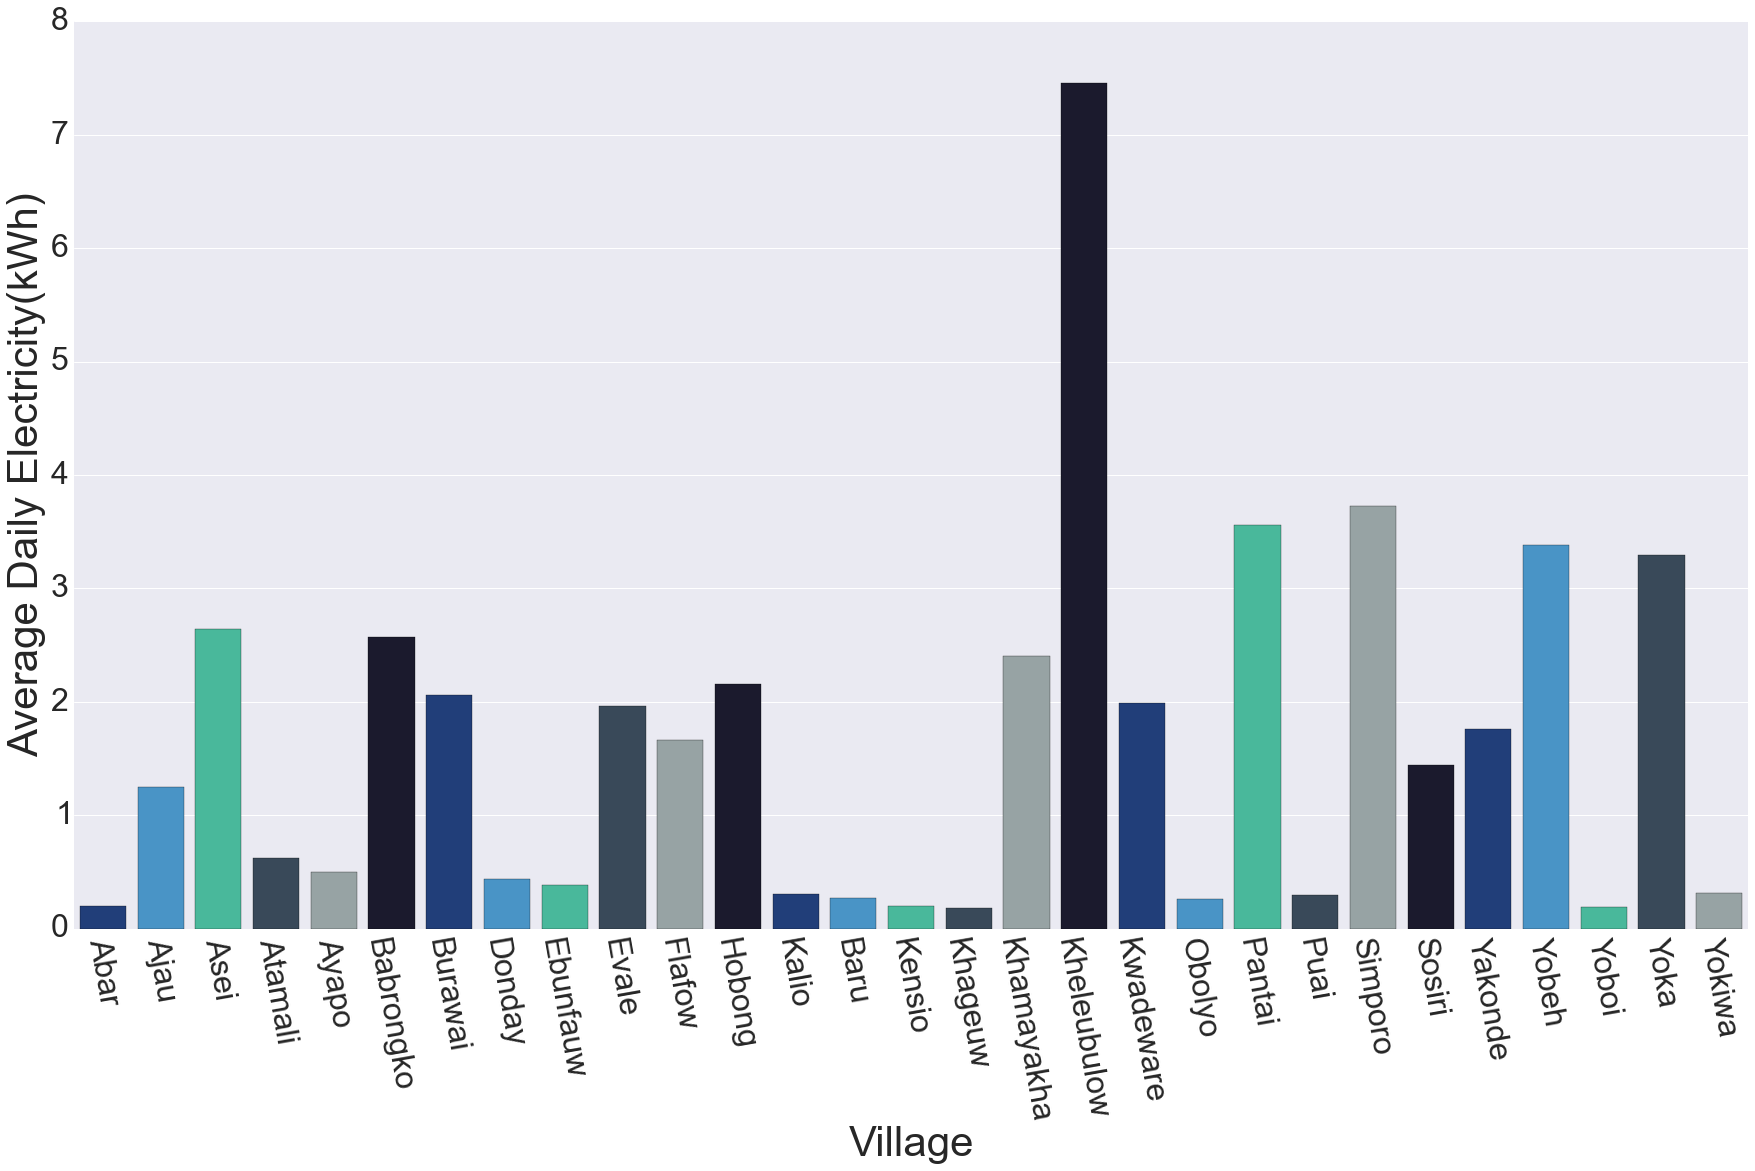

In [11]:
plt.figure(figsize=(30,18))
custom = ["#133987", "#3498db", "#36CBA4", "#34495e", "#95a5a6", "#181730"]
sns.barplot(x='village_name', y='Avg_Daily_Energy',
            data=df1,palette= custom)
plt.ylabel('Average Daily Electricity(kWh)', fontsize=42)
plt.xlabel('Village', fontsize=42)
plt.xticks(rotation=-80)
plt.tick_params(labelsize=32)
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('village-energy.png')

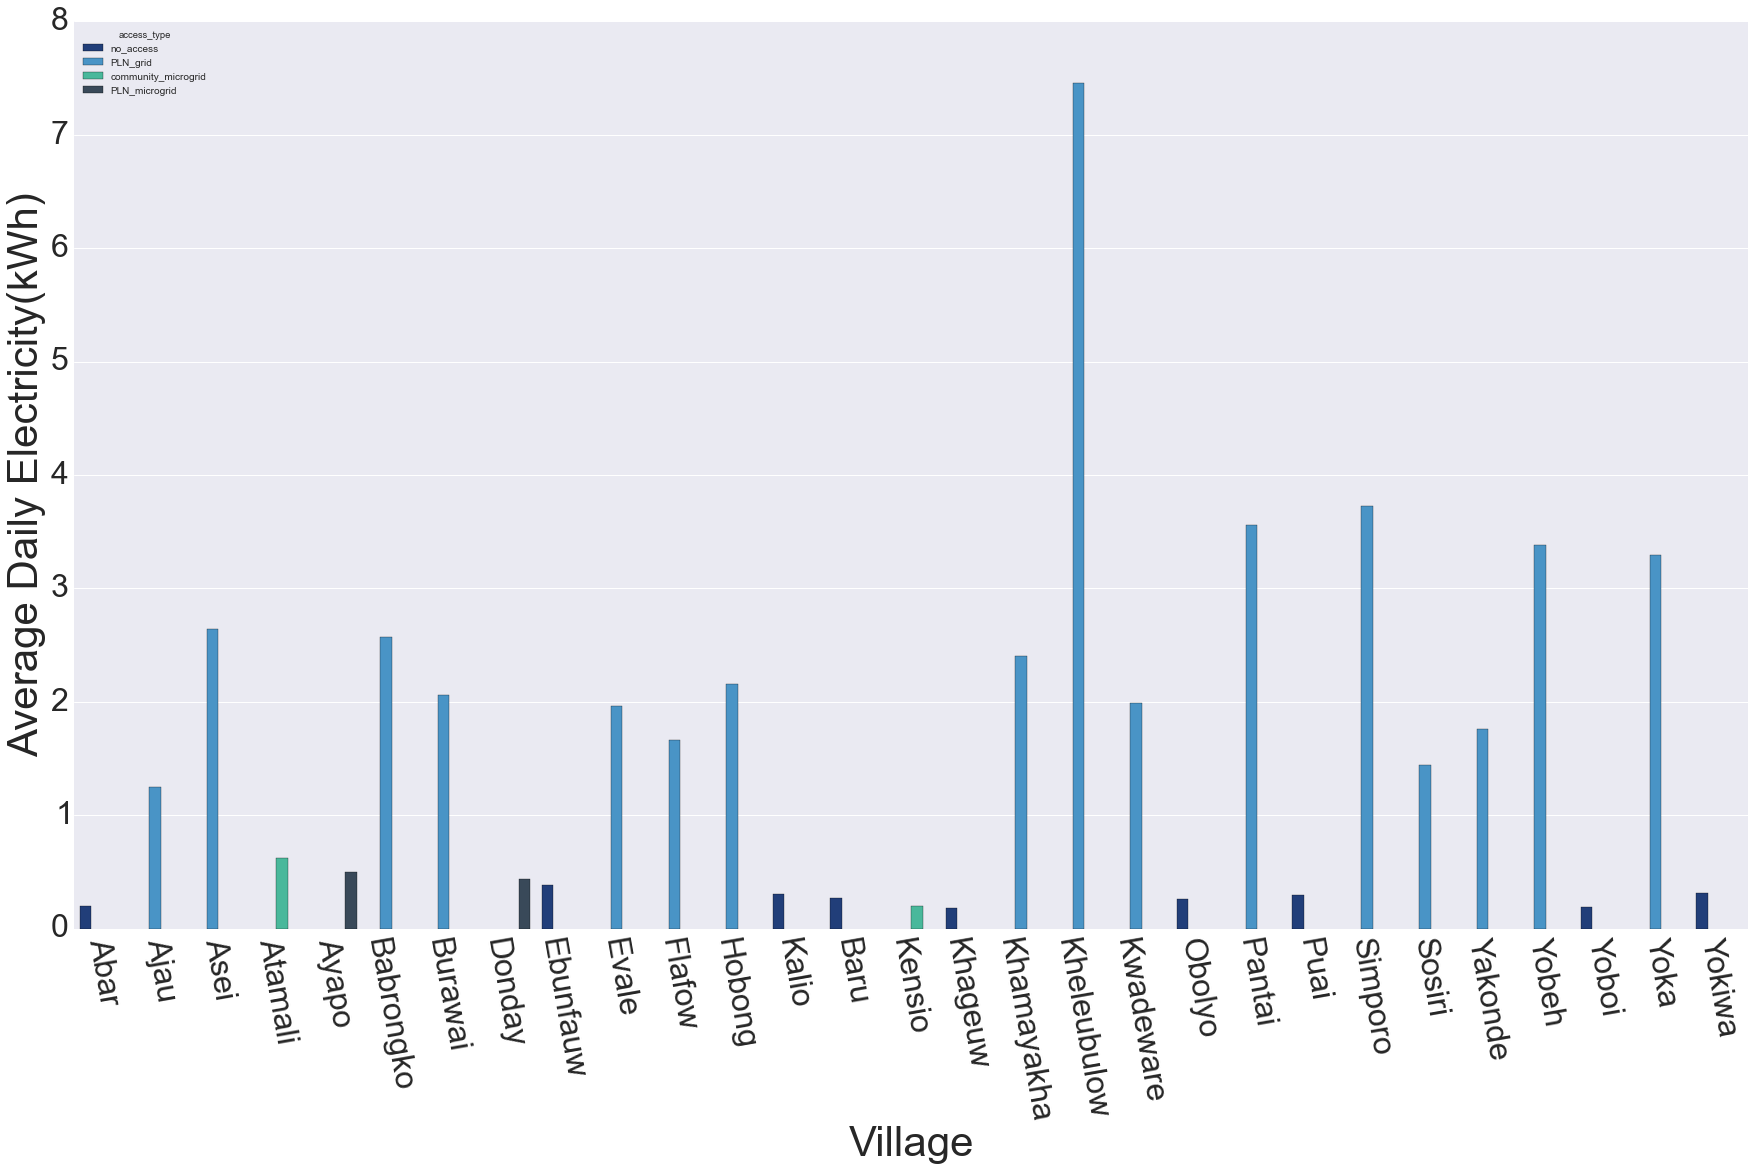

In [12]:
plt.figure(figsize=(30,18))
custom = ["#133987", "#3498db", "#36CBA4", "#34495e"]
sns.barplot(x='village_name', y='Avg_Daily_Energy',hue='access_type',
            data=df1,palette= custom)
plt.ylabel('Average Daily Electricity(kWh)', fontsize=42)
plt.xlabel('Village', fontsize=42)
plt.xticks(rotation=-80)
plt.tick_params(labelsize=32)
plt.gcf().subplots_adjust(bottom=0.20)
#plt.savefig('village-energy.png')

In [13]:
df2 = df1[df1['village_name'].str.contains('Ajau|Asei|Atamali|Ayapo|Kensio')]
df2

,Avg_Daily_Energy,village_name,access_type
1,1.249592,Ajau,PLN_grid
2,2.637685,Asei,PLN_grid
3,0.626163,Atamali,community_microgrid
4,0.495869,Ayapo,PLN_microgrid
14,0.201654,Kensio,community_microgrid


In [14]:
test = pd.Series({'Ajau':6, 'Ajau':5.6, 'Atamali':0.63, 'Ayapo':0.83,'Kensio':0.63})

In [15]:
test

Ajau       5.60
Atamali    0.63
Ayapo      0.83
Kensio     0.63
dtype: float64

In [16]:
df1.groupby('access_type').mean().reset_index()

,access_type,Avg_Daily_Energy
0,PLN_grid,2.707501
1,PLN_microgrid,0.467777
2,community_microgrid,0.413909
3,no_access,0.264838
